In [13]:
import os
os.chdir('/scratch/i10-bluesky/src/')
from i10_bluesky.devices.rasor.detectorSlits import *
from i10_bluesky.devices.scalerCard import ScaleCard
from bluesky import RunEngine
from ophyd_async.core import DeviceCollector 
import bluesky.plan_stubs as bps
from bluesky.plans import count, scan 
from ophyd.sim import motor1,det1
from bluesky.callbacks.best_effort import BestEffortCallback
import asyncio
loop = asyncio.get_event_loop()
bec = BestEffortCallback()
RE = RunEngine({})

In [2]:
with DeviceCollector():
    ds = DetectorSlits('ME01D-MO-APTR',name = "detSlits")
    dsd = Slits('ME01D-MO-APTR', "-01:TRANS.RBV", "dsd")
    scaler = ScaleCard("ME01D-EA-SCLR-01", name = "rscaler")
    



Transient Scan ID: 1     Time: 2024-03-04 13:42:26
Persistent Unique Scan ID: '569c229f-1670-4d65-af3f-74e877277ad9'
New stream: 'primary'
+-----------+------------+--------------+--------------+
|   seq_num |       time | detSlits-dsd | detSlits-dsu |
+-----------+------------+--------------+--------------+
|         1 | 13:42:26.3 |       25.600 |       26.091 |
|         2 | 13:42:26.5 |       25.600 |       26.091 |
|         3 | 13:42:26.7 |       25.600 |       26.091 |
|         4 | 13:42:26.9 |       25.600 |       26.091 |
|         5 | 13:42:27.1 |       25.600 |       26.091 |
|         6 | 13:42:27.3 |       25.600 |       26.091 |
|         7 | 13:42:27.5 |       25.600 |       26.091 |
|         8 | 13:42:27.7 |       25.600 |       26.091 |
|         9 | 13:42:27.9 |       25.600 |       26.091 |
|        10 | 13:42:28.1 |       25.600 |       26.091 |
+-----------+------------+--------------+--------------+
generator count ['569c229f'] (scan num: 1)





('569c229f-1670-4d65-af3f-74e877277ad9',)

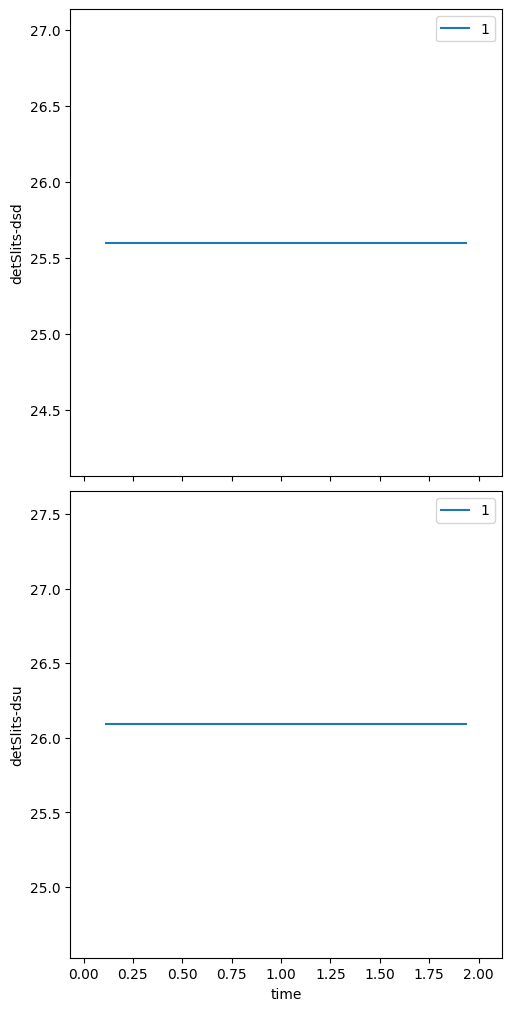

In [3]:
RE(count([ds.dsd,ds.dsu,scaler],10,0.2),bec)

In [11]:
scaler.hints.setdefault('mac17')

In [11]:
scaler

ScaleCard(prefix='ME01D-EA-SCLR-01', name='rscaler', read_attrs=['macr1'], configuration_attrs=[])

In [4]:
scaler = ScaleCard("ME01D-EA-SCLR-01", name = "rscaler")

In [14]:
loop = asyncio.get_event_loop()
result = loop.create_task(ds.dsd.read())

In [16]:
result.result()

{'detSlits-dsd': {'value': 25.6000703125,
  'timestamp': 1709561796.608889,
  'alarm_severity': 0}}

In [17]:
scaler

ScaleCard(prefix='ME01D-EA-SCLR-01', name='rscaler', read_attrs=['macr1'], configuration_attrs=[])

In [72]:
async def test():
    y = await ds.dsu.read()
    print(y)
    return y

In [20]:
from ophyd_async.core import DeviceCollector

In [21]:
with DeviceCollector():
    ds

In [76]:
async def main():
    await asyncio.gather(test(), test(), test())


/tmp/ipykernel_19415/3708891618.py:3: RuntimeWarning: coroutine 'main' was never awaited
  next(main())


TypeError: 'coroutine' object is not an iterator

In [36]:
ds.dsd.readback.get_value()

<coroutine object SignalR.get_value at 0x7fb9fa960540>

In [11]:
from bluesky.plan_stubs import checkpoint, abs_set, trigger_and_read
def one_1d_step(detectors):
    yield from count(detectors,10,0.1)
    yield from count(detectors,5,0.1)



Transient Scan ID: 4     Time: 2024-03-04 13:45:37
Persistent Unique Scan ID: '7605219a-8bb1-48fc-aa71-6ca8a3ea1a13'
New stream: 'primary'
+-----------+------------+--------------+--------------+
|   seq_num |       time | detSlits-dsd | detSlits-dsu |
+-----------+------------+--------------+--------------+
|         1 | 13:45:37.4 |       25.600 |       26.091 |
|         2 | 13:45:37.5 |       25.600 |       26.091 |
|         3 | 13:45:37.6 |       25.600 |       26.091 |
|         4 | 13:45:37.7 |       25.600 |       26.091 |
|         5 | 13:45:37.9 |       25.600 |       26.091 |
|         6 | 13:45:38.0 |       25.600 |       26.091 |
|         7 | 13:45:38.1 |       25.600 |       26.091 |
|         8 | 13:45:38.2 |       25.600 |       26.091 |
|         9 | 13:45:38.3 |       25.600 |       26.091 |
|        10 | 13:45:38.4 |       25.600 |       26.091 |
+-----------+------------+--------------+--------------+
generator count ['7605219a'] (scan num: 4)





Transient Sca

('7605219a-8bb1-48fc-aa71-6ca8a3ea1a13',
 'd7ac88cf-7d9f-4fba-812b-4943669f234e')

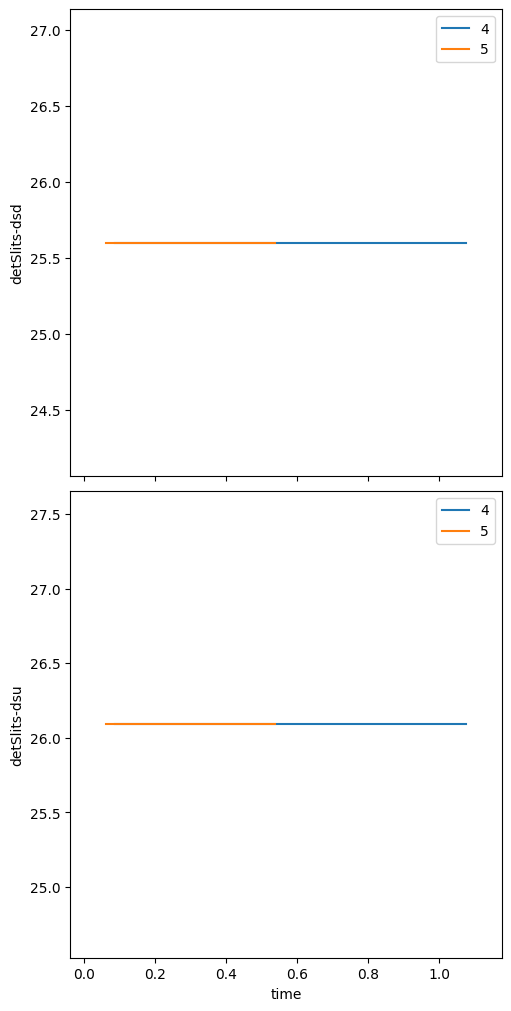

In [12]:
RE(one_1d_step([ds.dsd,ds.dsu]),bec)